# Main Quest 05

## 1. 데이터 이해 및 탐색
- 각 feature에 대한 이해가 명확한가?
- 데이터의 분포와 특성을 파악하기 위한 적절한 시각화가 이루어졌는가?
- 데이터에서 유의미한 인사이트를 도출하였는가?

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [4]:
train_df = pd.read_csv('./data/MainQuest05/train.csv')
test_df = pd.read_csv('./data/MainQuest05/test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113923 entries, 0 to 113922
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113923 non-null  int64  
 1   Time    113923 non-null  float64
 2   V1      113923 non-null  float64
 3   V2      113923 non-null  float64
 4   V3      113923 non-null  float64
 5   V4      113923 non-null  float64
 6   V5      113923 non-null  float64
 7   V6      113923 non-null  float64
 8   V7      113923 non-null  float64
 9   V8      113923 non-null  float64
 10  V9      113923 non-null  float64
 11  V10     113923 non-null  float64
 12  V11     113923 non-null  float64
 13  V12     113923 non-null  float64
 14  V13     113923 non-null  float64
 15  V14     113923 non-null  float64
 16  V15     113923 non-null  float64
 17  V16     113923 non-null  float64
 18  V17     113923 non-null  float64
 19  V18     113923 non-null  float64
 20  V19     113923 non-null  float64
 21  V20     11

In [9]:
train_df_x = train_df.iloc[ :, 2:-1 ]
train_df_y = train_df.iloc[ : , -1 ]

test_df_x = test_df.iloc[ :, 2: ]

In [10]:
train_df_x.shape, train_df_y.shape, test_df_x.shape

((170883, 29), (170883,), (113923, 29))

In [11]:
train_df_x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,0.018887,-0.029860,...,0.030951,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704
std,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,1.152284,1.096870,...,0.725834,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429
min,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000
25%,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,-0.660083,-0.519237,...,-0.183583,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000
50%,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,-0.078963,-0.111448,...,-0.036160,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000
75%,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,0.641358,0.408345,...,0.155777,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000
max,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000


- training 데이터 시각화 1: histogram

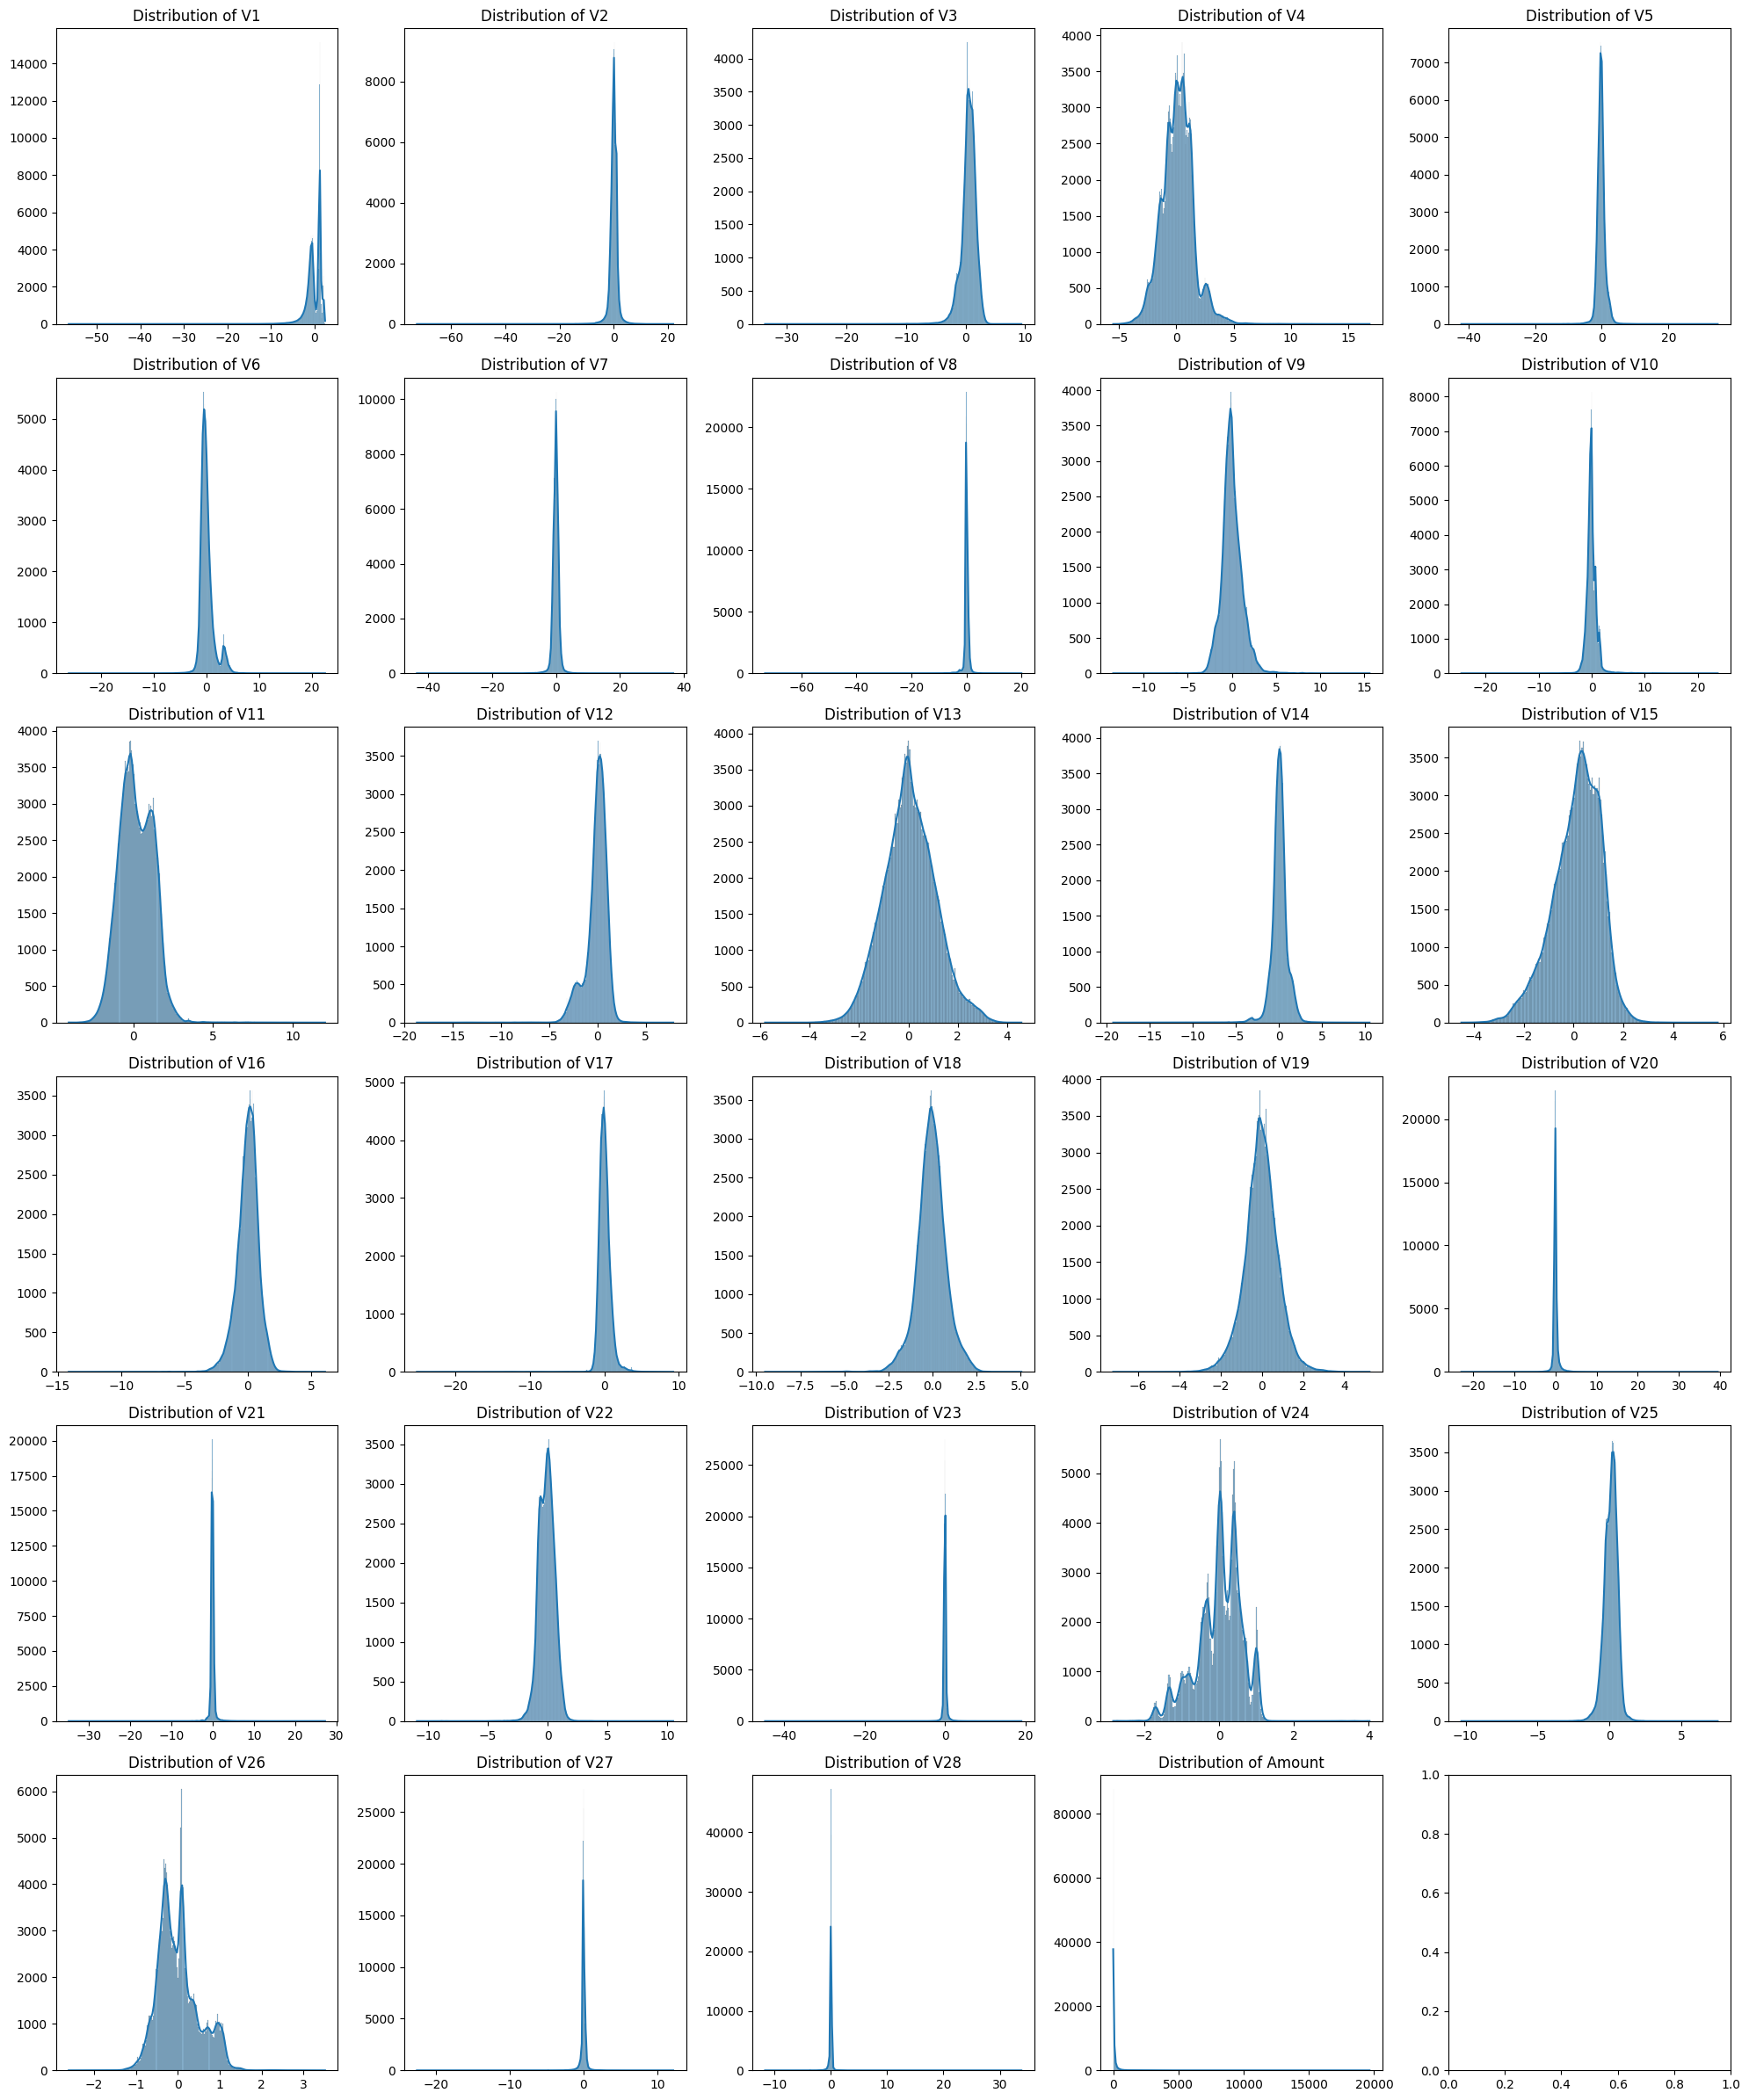

In [22]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20,24))

ax_list = axes.flatten()

for i, col in enumerate(train_df_x.columns):
    ax = ax_list[i]
    
    sns.histplot(train_df_x[col], kde=True, ax=ax)
    
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.tight_layout()
plt.show()

- training 데이터 시각화 2: Q-Q plot

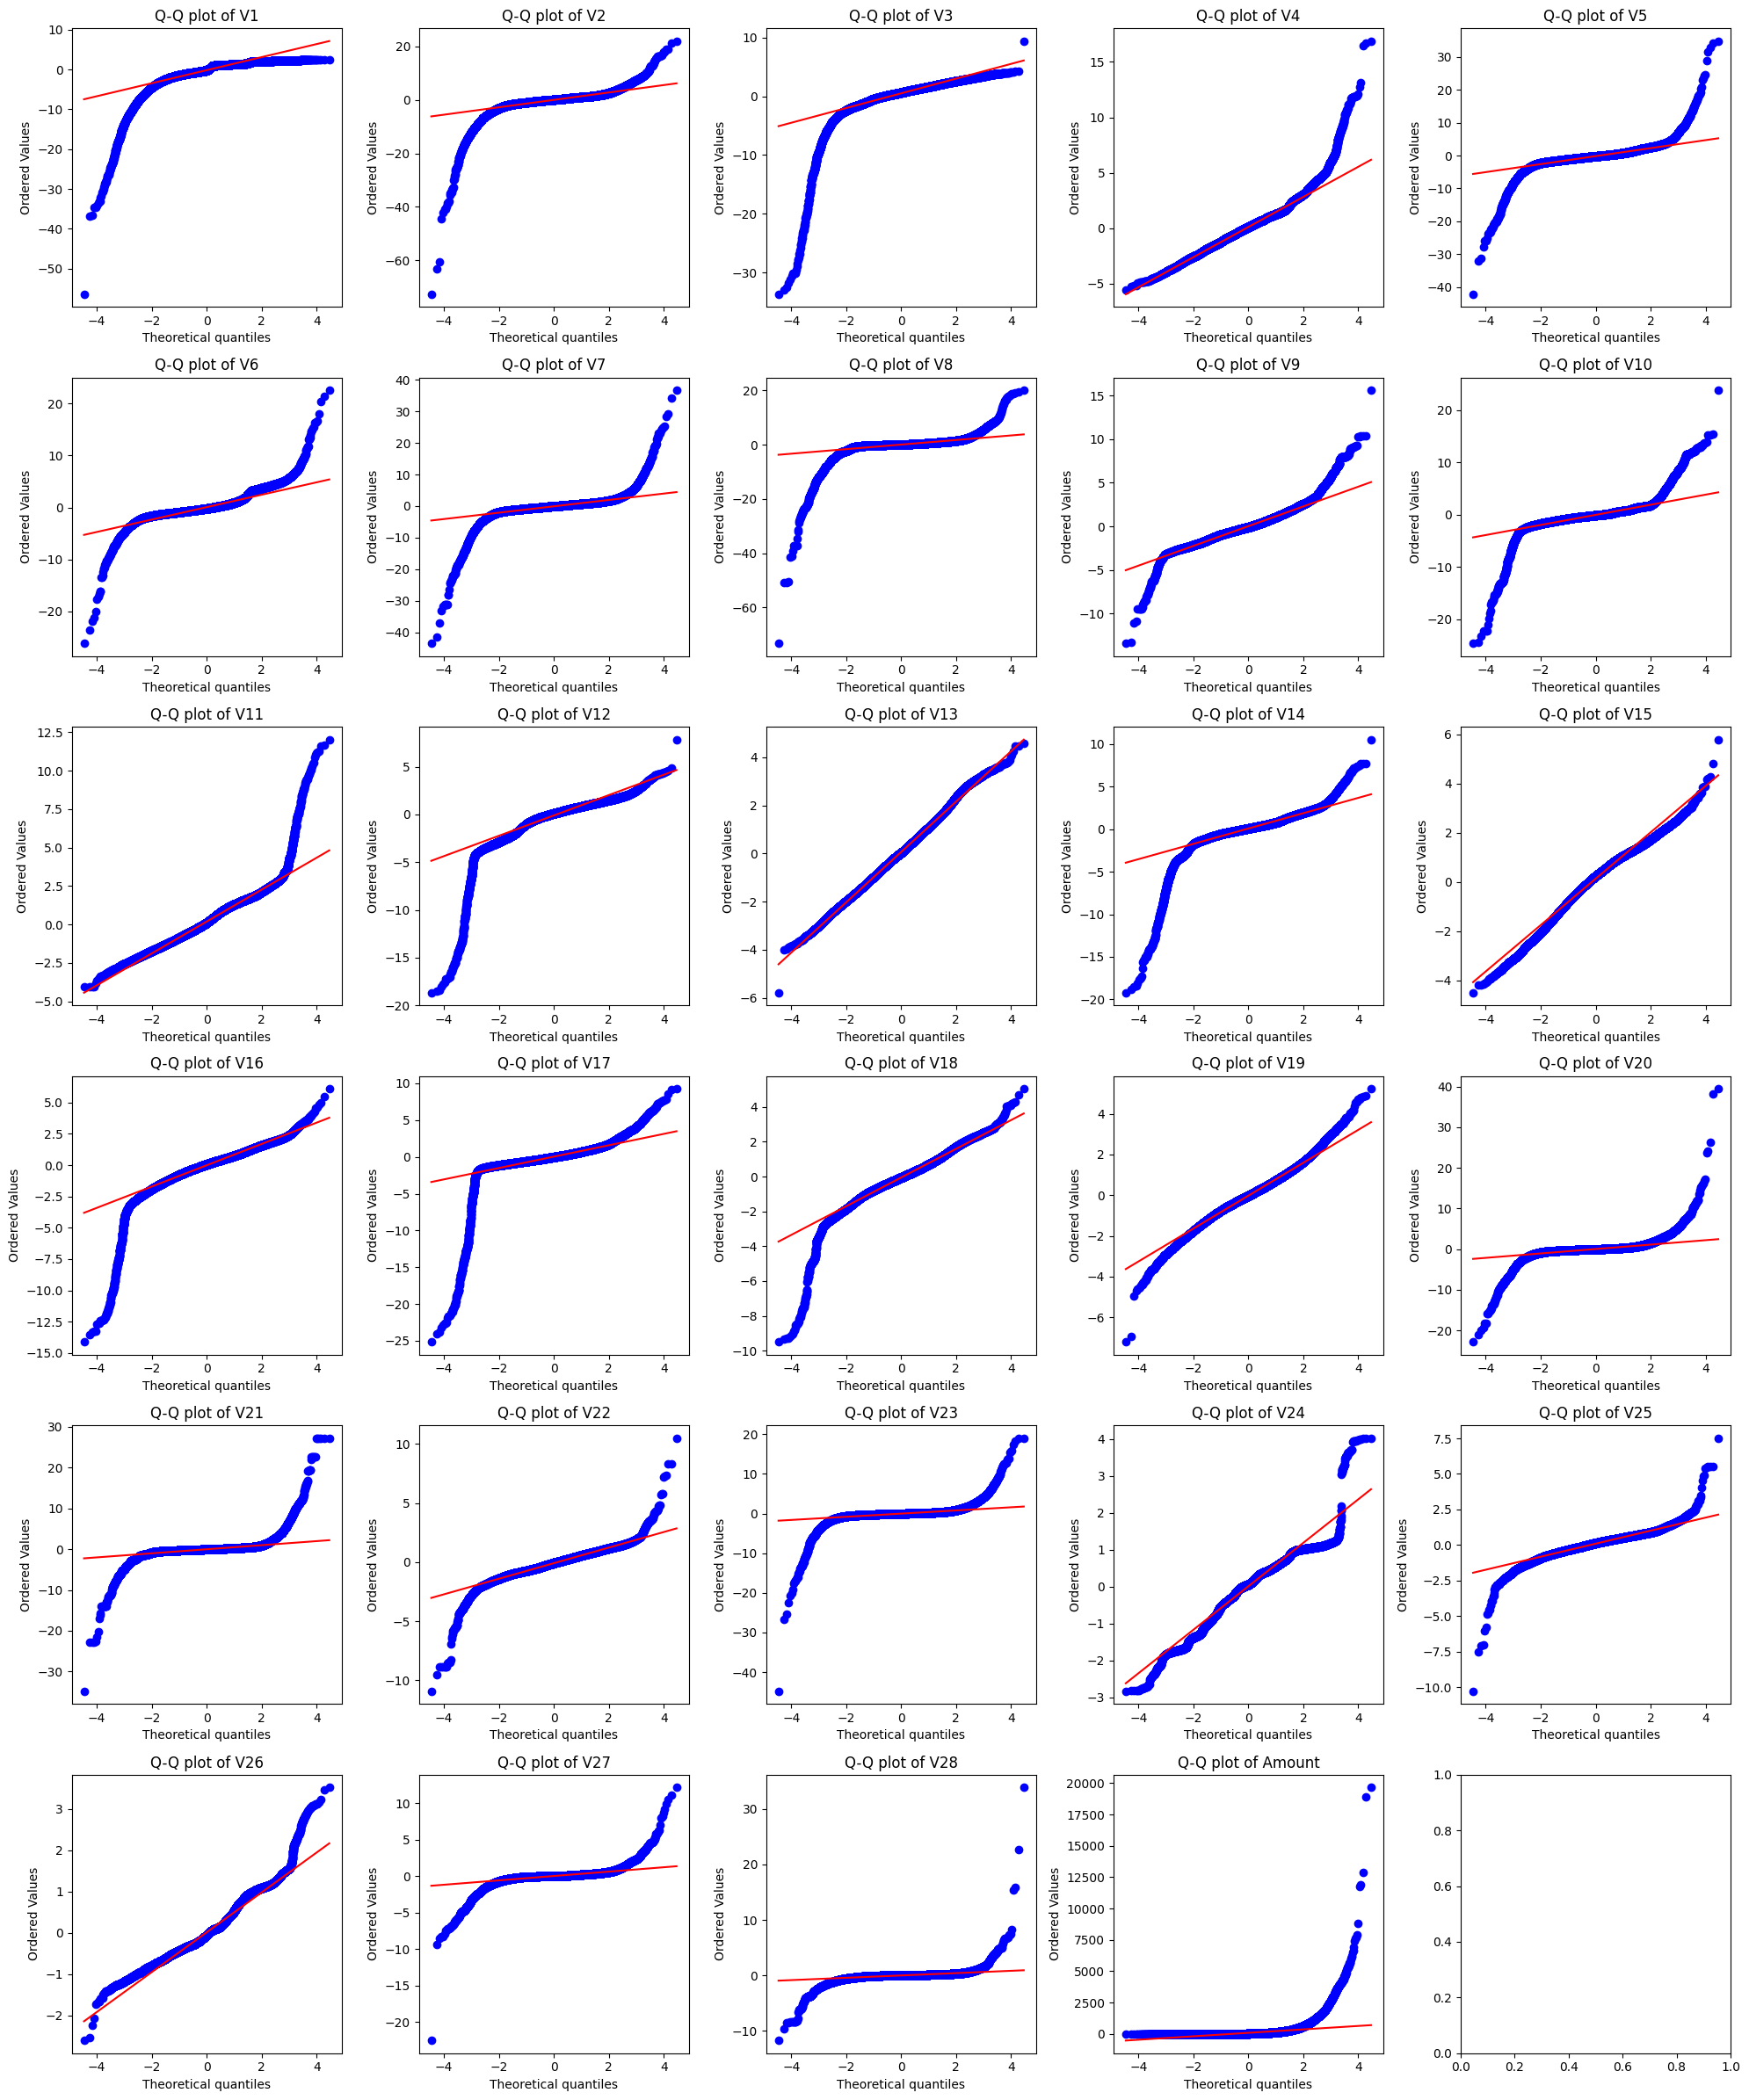

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20,24))

ax_list = axes.flatten()

for i, col in enumerate(train_df_x.columns):
    ax = ax_list[i]
    
    stats.probplot(train_df_x[col], dist='norm', plot=ax)
    
    ax.set_title(f'Q-Q plot of {col}')
    
fig.tight_layout()
plt.show()

- 정상 거래 / 비정상 거래를 구분한 시각화

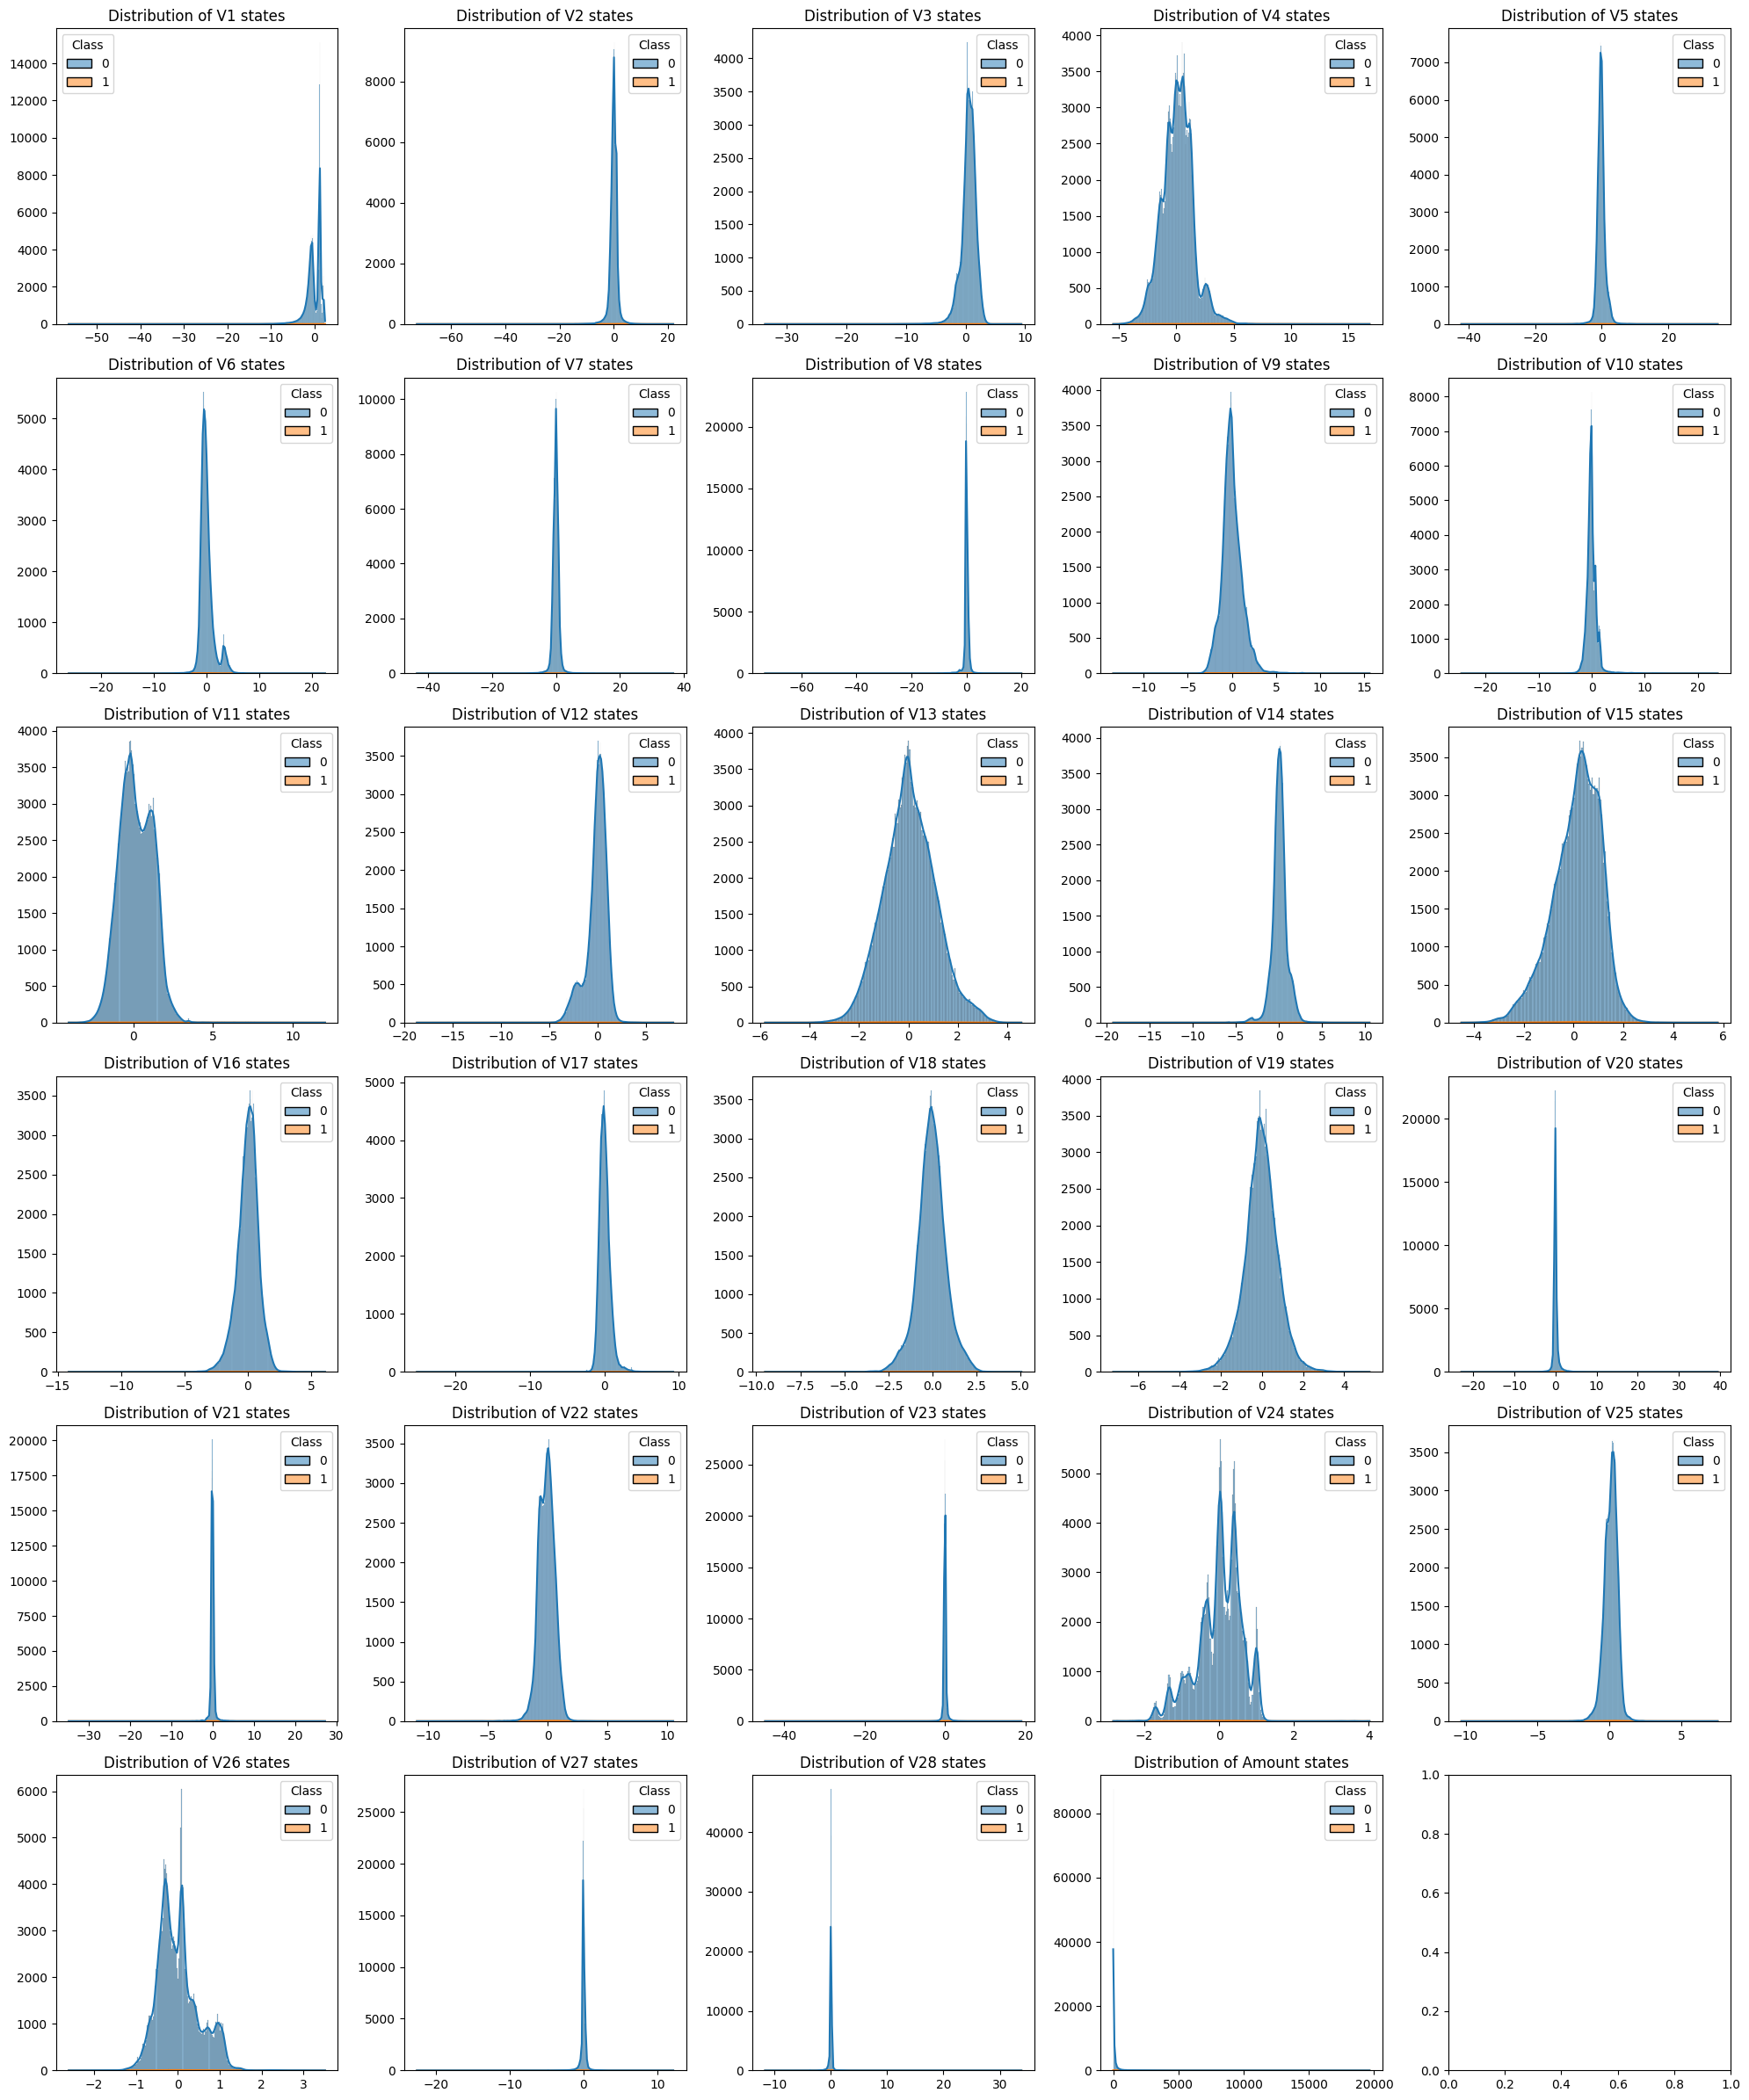

In [26]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20,24))

ax_list = axes.flatten()

for i, col in enumerate(train_df_x.columns):
    ax = ax_list[i]
    
    sns.histplot(data=train_df, x=col, hue='Class', kde=True, ax=ax)
    
    ax.set_title(f'Distribution of {col} states')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.tight_layout()
plt.show()

- 클래스 0의 수를 클래스 1과 동일하게 샘플링 하는 것을 1000번 정도 실행한 후, 데이터의 분포를 보는 것도 좋을 것 같다...

## 2. 데이터 전처리 과정
- 결측치 처리, 이상치 처리 등 데이터 정제가 적절하게 수행되었는가?
- 데이터 스케일링 및 인코딩 등이 적절히 수행되었는가?
- feature engneering이 적절하고 창의적으로 이루어졌는가?

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [31]:
train_x, val_x, train_y, val_y = train_test_split(train_df_x, train_df_y, test_size=0.2, random_state=2025, stratify=train_df_y)

In [33]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((136706, 29), (136706,), (34177, 29), (34177,))

In [34]:
rs_scaler = RobustScaler()

train_x_rs = rs_scaler.fit_transform(train_x)
val_x_rs = rs_scaler.transform(val_x)
test_x_rs = rs_scaler.transform(test_df_x)

## 3. 모델 선택 및 비교
- 최소 3개 이상의 모델을 비교하는가?
- 모델 선택 이유와 각 모델의 특성을 잘 설명하였는가?
- Ensemble 방법을 사용하여 성능을 비교하였는가?

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [49]:
model_lr = LogisticRegression(max_iter=2000, class_weight='balanced')

model_lr.fit(train_x_rs, train_y)

pred_lr = model_lr.predict(val_x_rs)

In [53]:
model_rfc = RandomForestClassifier(n_estimators=500, max_depth=5)

model_rfc.fit(train_x_rs, train_y)

pred_rfc = model_rfc.predict(val_x_rs)

In [ ]:
model_xgbc = XGBClassifier(n_estimators=500, n_jobs=-1)

model_xgbc.fit(train_x_rs, train_y)

pred_xgbc = model_xgbc.predict(val_x_rs)

## 4. 성능 평가
- 검정 데이터에 대한 평가 지표가 명확하게 제시되었는가?
- 평가 지표가 타당하며 모델 성능을 잘 반영하는가?
- Hyperparameter를 튜닝하여 진행한 후, 결과를 기록하였는가?

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

In [69]:
print(classification_report(val_y, pred_lr))
print('----------------------------')
print( confusion_matrix(val_y, pred_lr) )
print('----------------------------')
print('ROC AUC score:', roc_auc_score(val_y, pred_lr) )
print('----------------------------')
print('Average Precision score:', average_precision_score(val_y, pred_lr) )

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34105
           1       0.08      0.94      0.14        72

    accuracy                           0.98     34177
   macro avg       0.54      0.96      0.57     34177
weighted avg       1.00      0.98      0.99     34177

----------------------------
[[33296   809]
 [    4    68]]
----------------------------
ROC AUC score: 0.9603617912003779
----------------------------
Average Precision score: 0.07334648158491329


In [62]:
print(classification_report(val_y, pred_rfc))
print('----------------------------')
print( confusion_matrix(val_y, pred_rfc) )
print('----------------------------')
print('ROC AUC score:', roc_auc_score(val_y, pred_rfc) )
print('----------------------------')
print('Average Precision score:', average_precision_score(val_y, pred_rfc) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34105
           1       0.91      0.81      0.85        72

    accuracy                           1.00     34177
   macro avg       0.95      0.90      0.93     34177
weighted avg       1.00      1.00      1.00     34177

----------------------------
[[34099     6]
 [   14    58]]
----------------------------
ROC AUC score: 0.902689814136083
----------------------------
Average Precision score: 0.7304443544310176


In [63]:
print(classification_report(val_y, pred_xgbc))
print('----------------------------')
print( confusion_matrix(val_y, pred_xgbc) )
print('----------------------------')
print('ROC AUC score:', roc_auc_score(val_y, pred_xgbc) )
print('----------------------------')
print('Average Precision score:', average_precision_score(val_y, pred_xgbc) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34105
           1       0.09      0.07      0.08        72

    accuracy                           1.00     34177
   macro avg       0.54      0.53      0.54     34177
weighted avg       1.00      1.00      1.00     34177

----------------------------
[[34055    50]
 [   67     5]]
----------------------------
ROC AUC score: 0.5339891918747659
----------------------------
Average Precision score: 0.008273514026652103


우리의 관심은 사기 거래를 사기 거래라고 잘 예측하는 것이다. 그렇지만 사기 거래 데이터의 수 자체가 적기 때문에 평가 지표를 Accuracy로만 볼 수는 없다.  
정상 거래 데이터의 비중이 압도적이기 때문에 모델은 예측하기를 대부분 정상 거래라 할 것이고, Accuracy는 이에 영향을 받아 항상 높게 나올 것이다.  
그래서 Precision, Recall 등의 다른 지표도 살펴보아야 한다.  
여기서의 Precision은 모델이 사기 거래라고 예측한 것 중 진짜 사기 거래의 비율이다.  
Recall은 진짜 사기 거래들 중 모델이 사기 거래라고 예측하여 맞춘 것의 비율이다.  

ROC curve와 AUC score도 보았다. False Positive Rate와 Recall의 관계를 보는 그래프로, score가 0.5 ~ 1의 값을 가진다.  
0.5는 y=x의 직선이고, 이는 모델이 랜덤하게 찍는 것과 별반 다를바 없다는 의미이다. 그래서 AUC score가 1에 가까울수록 좋은 모델이라 할 수 있다.  
그렇지만 해당 지표 역시 지금의 데이터에서는 한계가 있다.  
False Positive Rate를 계산할 때 True Negative가 들어가는데, 굉장히 많은 True Negative가 분모로써 동작을 하여,  
ROC curve를 좌상단에 근접하게 그리고, AUC score 또한 높게 나오게 만들어 좋은 모델이라고 착각할 수 있다.  

때문에, Precision-Recall curve와 Average Precision score도 함께 보아야 한다.  
Precision-Recall curve와 Average Precision score는 True Negative를 사용하지 않기에 보다 균형잡힌 지표라 할 수 있다.  
그래서 해당 지표값이 가장 높은 모델이 사기 거래를 잘 찾아내는 모델이며, 3개의 모델 중 Random Forest 모델에서 값이 가장 높게 나왔다.  

Logistic Regression 모델은 사기 거래라고 오탐지한 것이 809건이다. 이 때문에 Precision이 매우 낮게 나왔으며, F1-score 역시 낮게 나왔다.  
XGBoost 모델은 True Positive의 수 자체가 적다. 그래서 Precision과 Recall 모두 낮게 나왔다.  